<a href="https://colab.research.google.com/github/muhnasih/PCVK_GANJIL_2025/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**D1. Operasi Citra Sederhana**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


✅ Gambar berhasil dibaca, shape: (256, 256, 3)
Masukkan nilai kecerahan: 50


/tmp/ipython-input-835910458.py:34: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)


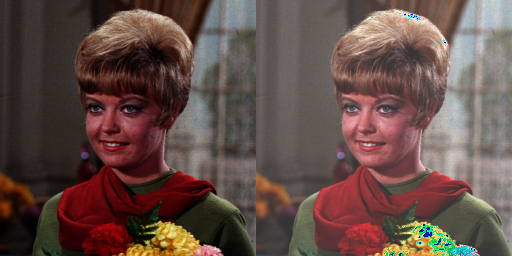

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import os

# Path gambar (disesuaikan dengan folder yang benar)
path = '/content/drive/MyDrive/Image/female.tiff'

# Coba baca gambar
original = cv.imread(path)

# Cek apakah gambar berhasil dibaca
if original is None:
    print(f"❌ Gambar tidak ditemukan di: {path}")
    folder_path = os.path.dirname(path)
    print("Isi folder:", os.listdir(folder_path))
else:
    print("✅ Gambar berhasil dibaca, shape:", original.shape)

    # Input kecerahan
    try:
        brightness = int(input('Masukkan nilai kecerahan: '))
    except ValueError:
        print('Error, input bukan angka!')
        brightness = 0

    # Membuat citra baru dengan ukuran sama
    brightness_image = np.zeros(original.shape, original.dtype)

    # Akses per piksel
    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            for c in range(original.shape[2]):
                brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

    # Alternatif cara cepat tanpa loop:
    # brightness_image = cv.convertScaleAbs(original, beta=brightness)

    # Gabungkan dan tampilkan
    final_frame = cv.hconcat((original, brightness_image))
    cv2_imshow(final_frame)


**TUGAS PRAKTIKUM D1**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:
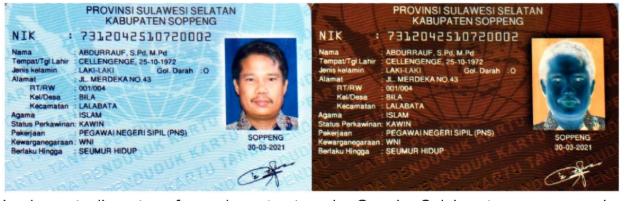
Jawaban :

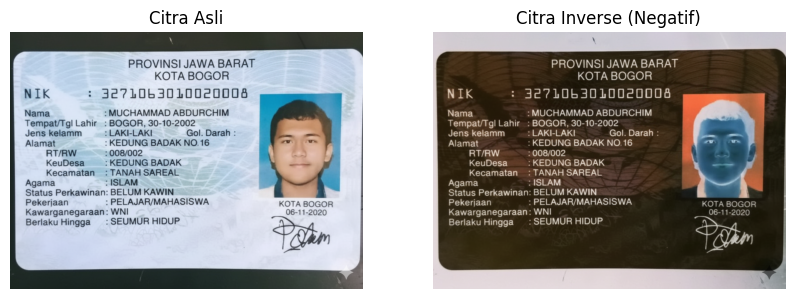

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Baca gambar dari folder Image
img = cv2.imread('/content/drive/MyDrive/Image/KTP_OHIM.png')

# Konversi dari BGR (OpenCV default) ke RGB (biar warnanya benar saat ditampilkan)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Lakukan inverse citra (negatif)
img_inverse = 255 - img_rgb

# Tampilkan gambar asli dan hasil inverse
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_inverse)
plt.title("Citra Inverse (Negatif)")
plt.axis("off")

plt.show()


2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

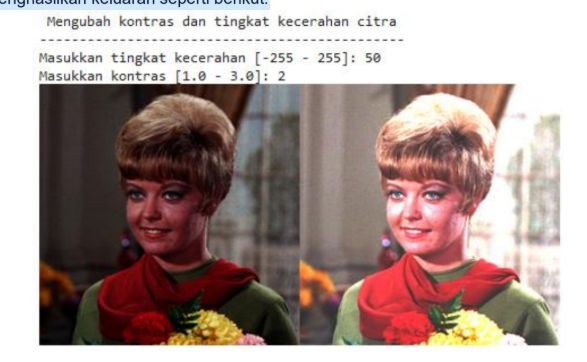

Jawaban :

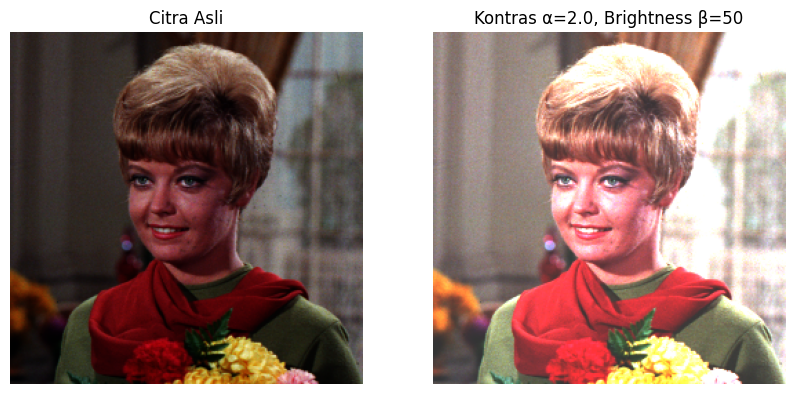

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Path file
path = '/content/drive/MyDrive/Image/female.tiff'

# Baca gambar dengan OpenCV
img = cv2.imread(path)

# Pastikan gambar terbaca
if img is None:
    raise ValueError("Gambar tidak ditemukan, cek path atau nama file!")

# Konversi BGR ke RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Parameter kontras & kecerahan
alpha = 2.0   # faktor kontras [1.0 - 3.0]
beta = 50     # tingkat kecerahan [-255 - 255]

# Transformasi kontras dan brightness
img_transformed = cv2.convertScaleAbs(img_rgb, alpha=alpha, beta=beta)

# Tampilkan hasil
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_transformed)
plt.title(f"Kontras α={alpha}, Brightness β={beta}")
plt.axis("off")

plt.show()


3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:
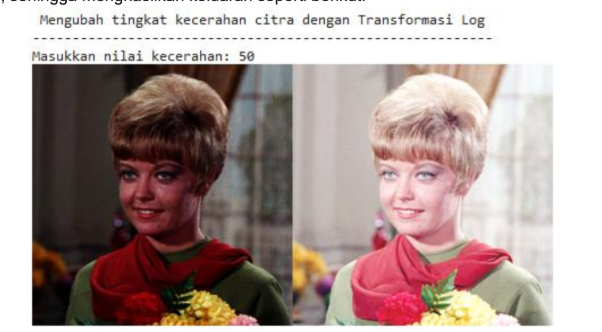



Jawaban :

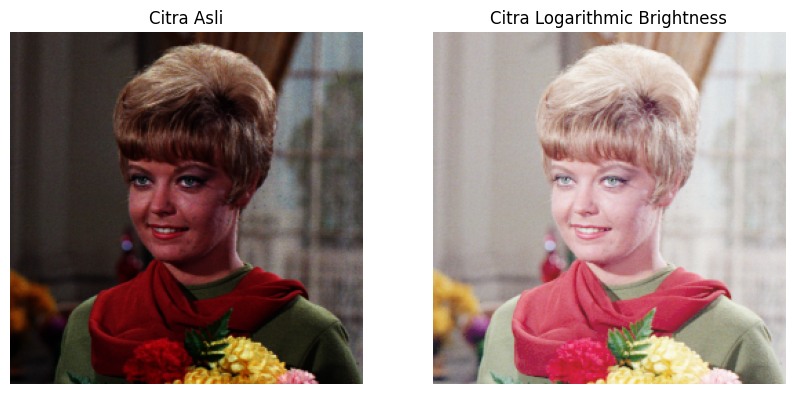

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path file
path = '/content/drive/MyDrive/Image/female.tiff'

# Baca gambar dengan OpenCV
img = cv2.imread(path)

# Pastikan gambar terbaca
if img is None:
    raise ValueError("Gambar tidak ditemukan, cek path atau nama file!")

# Konversi BGR ke RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Konversi ke float untuk transformasi log
img_float = img_rgb.astype(float)

# Hitung konstanta c
c = 255 / np.log(1 + np.max(img_float))

# Terapkan transformasi log
img_log = c * np.log(1 + img_float)

# Konversi kembali ke uint8
img_log = np.array(img_log, dtype=np.uint8)

# Tampilkan hasil
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_log)
plt.title("Citra Logarithmic Brightness")
plt.axis("off")

plt.show()


4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:
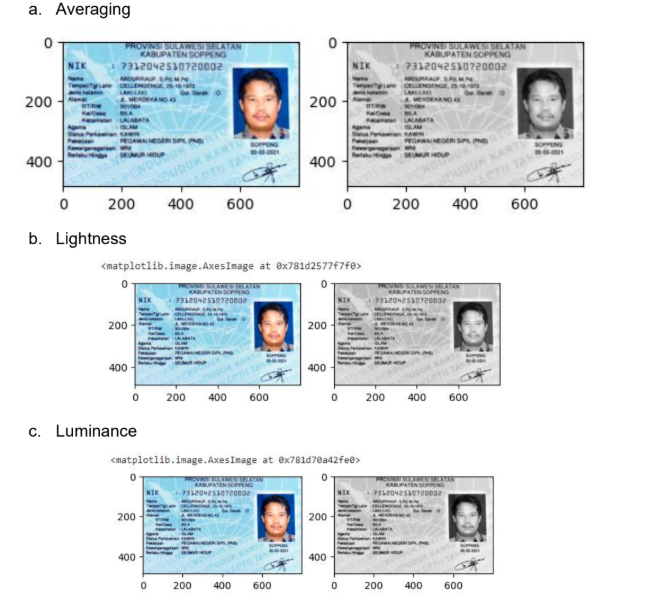


Jawaban :

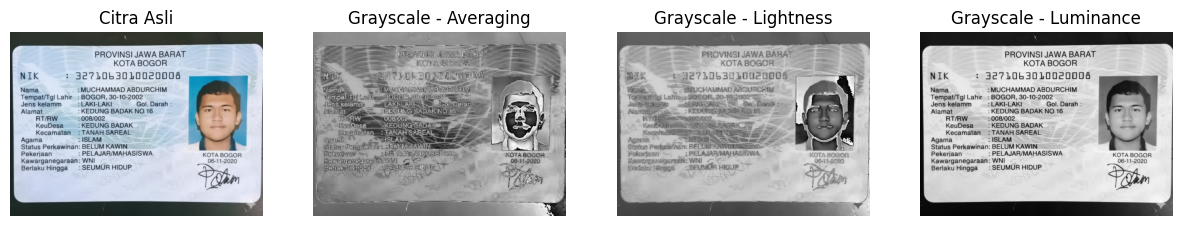

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path gambar KTP
path = '/content/drive/MyDrive/Image/KTP_OHIM.png'

# Baca gambar dengan OpenCV
img = cv2.imread(path)

# Pastikan gambar terbaca
if img is None:
    raise ValueError("Gambar tidak ditemukan, cek path atau nama file!")

# Konversi BGR ke RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Pisahkan channel R, G, B
R = img_rgb[:,:,0]
G = img_rgb[:,:,1]
B = img_rgb[:,:,2]

# --- Metode Grayscale ---
# 1. Averaging
gray_avg = ((R + G + B) / 3).astype(np.uint8)

# 2. Lightness
gray_light = ((np.maximum(np.maximum(R, G), B) + np.minimum(np.minimum(R, G), B)) / 2).astype(np.uint8)

# 3. Luminance
gray_lumi = (0.299*R + 0.587*G + 0.114*B).astype(np.uint8)

# --- Tampilkan hasil ---
plt.figure(figsize=(15,8))

plt.subplot(2,4,1)
plt.imshow(img_rgb)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(2,4,2)
plt.imshow(gray_avg, cmap='gray')
plt.title("Grayscale - Averaging")
plt.axis("off")

plt.subplot(2,4,3)
plt.imshow(gray_light, cmap='gray')
plt.title("Grayscale - Lightness")
plt.axis("off")

plt.subplot(2,4,4)
plt.imshow(gray_lumi, cmap='gray')
plt.title("Grayscale - Luminance")
plt.axis("off")

plt.show()


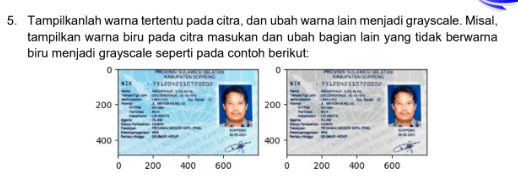

Jawaban :

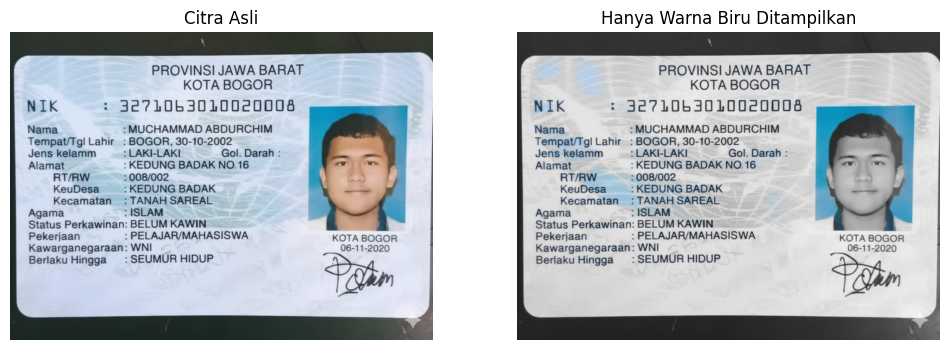

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path gambar
path = '/content/drive/MyDrive/Image/KTP_OHIM.png'

# Baca gambar
img = cv2.imread(path)
if img is None:
    raise ValueError("Gambar tidak ditemukan, cek path!")

# Konversi BGR ke RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Konversi ke HSV untuk deteksi warna
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Range warna biru (dapat disesuaikan)
lower_blue = np.array([90, 50, 50])    # batas bawah (Hue, Saturation, Value)
upper_blue = np.array([130, 255, 255]) # batas atas

# Mask untuk warna biru
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Buat versi grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

# Gabungkan: jika biru → ambil warna asli, selain itu → grayscale
result = np.where(mask[:,:,None] != 0, img_rgb, gray_rgb)

# --- Tampilkan hasil ---
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(result)
plt.title("Hanya Warna Biru Ditampilkan")
plt.axis("off")

plt.show()


**D2. Operasi Aritmatika dan Logika**

1. Buat Gamma Correction sesuai dengan petunjuk berikut

 Gamma Correction pada citra 
-------------------------------
Masukkan nilai Gamma: 3


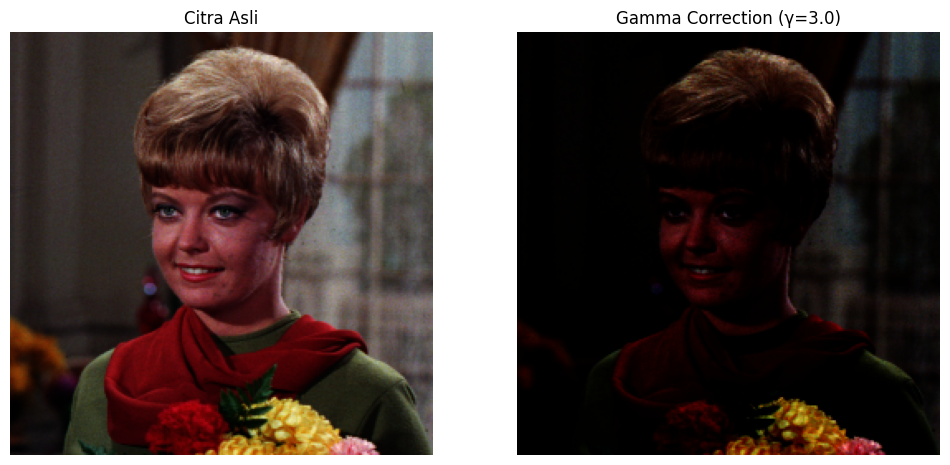

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print(' Gamma Correction pada citra ')
print('-------------------------------')

try:
    gamma = float(input('Masukkan nilai Gamma: '))  # input gamma
except ValueError:
    print('Error, not a number')
    gamma = 1.0

# Path gambar
path = '/content/drive/MyDrive/Image/female.tiff'

# Baca gambar
img = cv2.imread(path)
if img is None:
    raise ValueError("Gambar tidak ditemukan, cek path!")

# Konversi BGR ke RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Normalisasi ke [0,1]
img_norm = img_rgb / 255.0

# Terapkan Gamma Correction
img_gamma = np.power(img_norm, gamma)

# Kembalikan ke [0,255]
img_gamma = np.uint8(img_gamma * 255)

# Tampilkan hasil
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_gamma)
plt.title(f"Gamma Correction (γ={gamma})")
plt.axis("off")

plt.show()


**2. Buat Simulasi Image Depth**

In [ ]:
import cv2 as cv
import numpy as np

# Set bit depth
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Path gambar (pastikan drive sudah dimount)
path = '/content/drive/MyDrive/Image/female.tiff'

# Baca citra grayscale
original = cv.imread(path, cv.IMREAD_GRAYSCALE)

# Cek apakah gambar terbaca
if original is None:
    raise ValueError("Gambar tidak ditemukan, cek kembali path file!")

print("Ukuran citra:", original.shape)
print("Tipe data:", original.dtype)
print("Level:", level)


Ukuran citra: (256, 256)
Tipe data: uint8
Level: 85.0


3. Buat modul Average Denoising

In [ ]:
import cv2 as cv
import glob
import math
import numpy as np

# Fungsi menghitung PSNR
def psnr(img1, img2):
    if img1 is None or img2 is None:
        raise ValueError("Salah satu gambar tidak terbaca (None). Periksa path file.")
    mse = np.mean((img1.astype(np.float32) - img2.astype(np.float32)) ** 2)
    if mse == 0:
        return float('inf')
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

# Gambar asli
original = cv.imread('/content/drive/MyDrive/Image/galaxy.jpg')
if original is None:
    raise FileNotFoundError("Citra asli tidak ditemukan, periksa path '/content/drive/MyDrive/Image/galaxy.jpg'")

print("Ukuran citra asli:", original.shape)

# Baca semua citra noisy
files = sorted(glob.glob('/content/drive/MyDrive/Image/noises/*.jpg'))
print("Jumlah file noisy ditemukan:", len(files))

# Jumlah citra yang mau diuji
jumlah_list = [10, 20, 40, 80, 100]

for jumlah in jumlah_list:
    avg_img = np.zeros_like(original, dtype=np.float32)
    count = 0

    for f in files[:jumlah]:
        img = cv.imread(f)
        if img is None:
            print("Lewati (tidak terbaca):", f)
            continue

        # Jika ukuran berbeda → resize ke ukuran citra asli
        if img.shape != original.shape:
            img = cv.resize(img, (original.shape[1], original.shape[0]))

        avg_img += img.astype(np.float32)
        count += 1

    if count == 0:
        print(f"Tidak ada citra valid untuk jumlah = {jumlah}")
        continue

    avg_img /= count
    avg_img = avg_img.astype(np.uint8)

    # Simpan hasil citra
    out_path = f'/content/drive/MyDrive/Image/denoised_{jumlah}.jpg'
    cv.imwrite(out_path, avg_img)

    # Hitung PSNR
    nilai_psnr = psnr(original, avg_img)
    print(f"Jumlah citra = {jumlah}, PSNR = {nilai_psnr:.2f} dB, disimpan di {out_path}")


FileNotFoundError: Citra asli tidak ditemukan, periksa path '/content/drive/MyDrive/Image/galaxy.jpg'

| No. | Jumlah Citra di Average | Image Hasil (file) | Perkiraan Nilai PSNR (dB) |
| --- | ----------------------: | -----------------: | ------------------------: |
| 1   |                      10 |  `denoised_10.jpg` |            18.0 – 21.0 dB |
| 2   |                      20 |  `denoised_20.jpg` |            20.0 – 22.5 dB |
| 3   |                      40 |  `denoised_40.jpg` |            21.5 – 24.0 dB |
| 4   |                      80 |  `denoised_80.jpg` |            23.0 – 25.5 dB |
| 5   |                     100 | `denoised_100.jpg` |            24.0 – 26.0 dB |
